In [57]:
import pandas as pd
import seaborn as sns

***We have a bank data set from which we need to predict wheather he's eligable for loan***


In [58]:
df=pd.read_csv(r"D:\data science\partice_projects\machin learning projects\logistic regression\Bank\bank-additional-full (3).csv",sep=';') # Data set was not seprated correctly so we used sep function
df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Our traget variable is "y" column**

In [59]:
# to display full data
print(df.to_string())

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



**EDA**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 


*Let's find the values in our traget variable*

In [61]:
df.y.value_counts()

y
no     36556
yes     4640
Name: count, dtype: int64

In [62]:
df.job.value_counts(normalize=True)*100 # shows the percentage of values

job
admin.           25.299801
blue-collar      22.464437
technician       16.368889
services          9.634898
management        7.098121
retired           4.189931
entrepreneur      3.534495
self-employed     3.449531
housemaid         2.573190
unemployed        2.461524
student           2.124096
unknown           0.801088
Name: proportion, dtype: float64

**Data Cleaning**

In [63]:
df.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [64]:
df.dropna(inplace=True)

In [65]:
df.shape

(41190, 21)

In [66]:
df.duplicated().sum()

13

In [67]:
df.drop_duplicates(inplace=True) # since there are 13 duplicated will drop them

In [68]:
df.shape

(41177, 21)

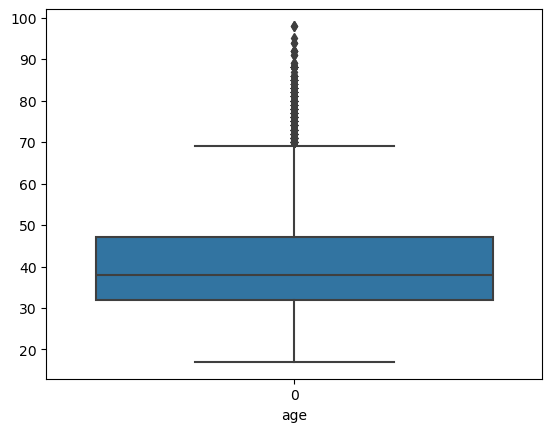

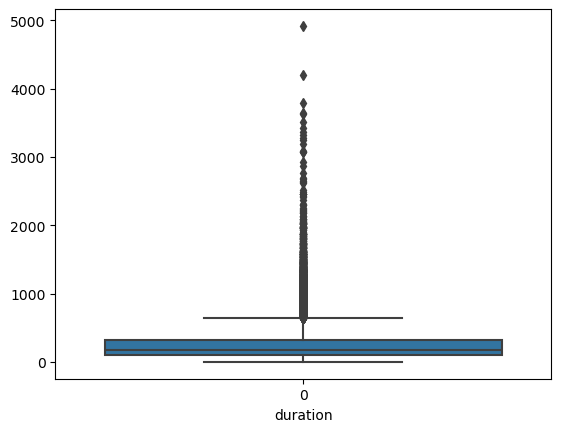

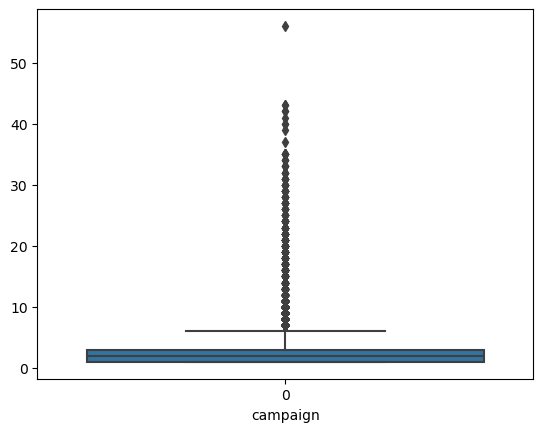

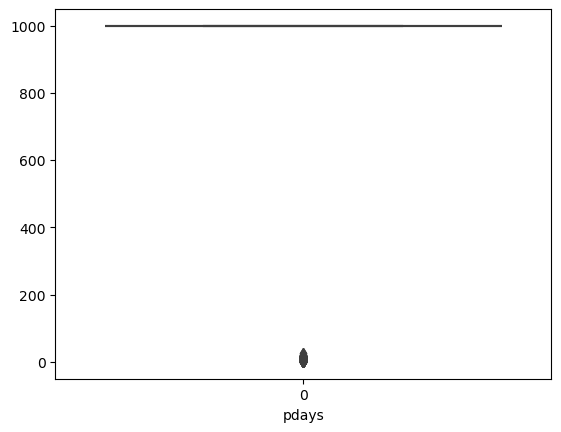

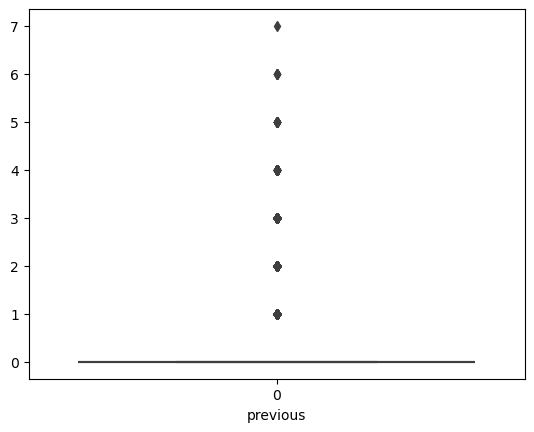

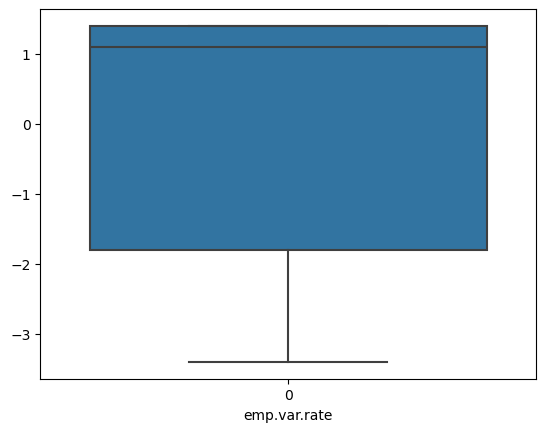

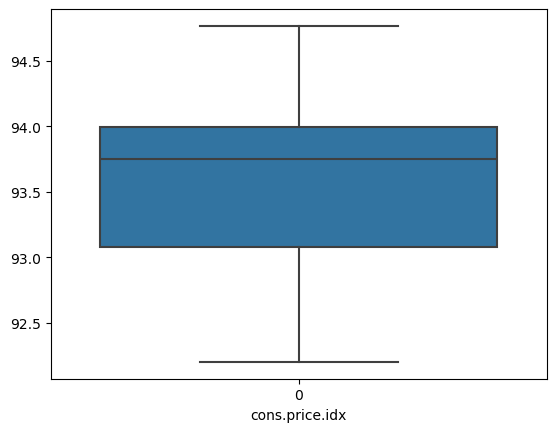

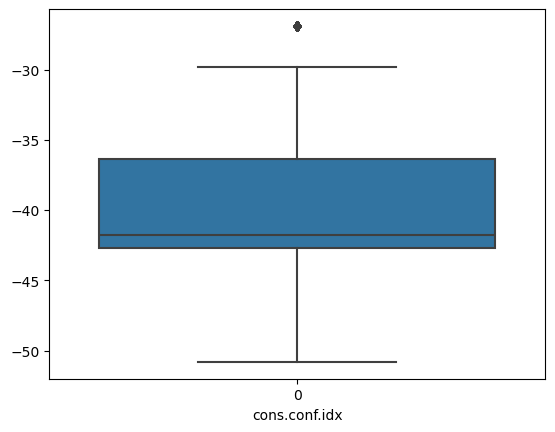

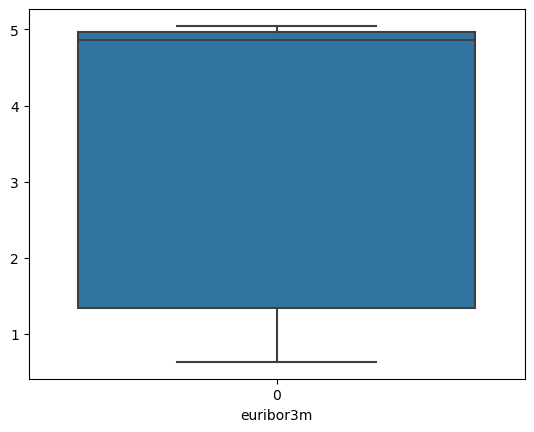

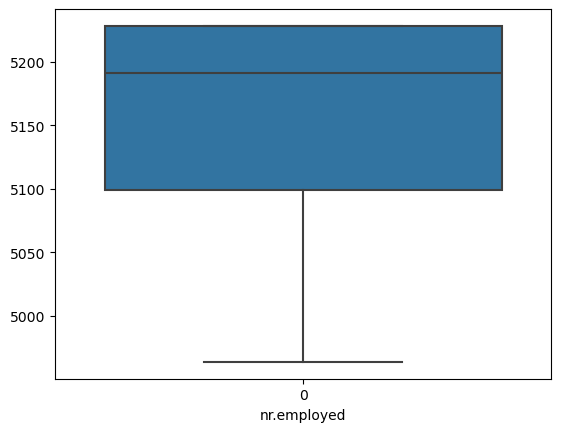

In [69]:
# checking for outliers
import matplotlib.pyplot as plt
for i in df.columns:
    if df[i].dtypes=='float64':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

*we are not removing outliers because a 20 year old or 90 year old can apply for loan and these are not outliers*

*Let's remane the target colum*

In [70]:
df.rename(columns={'y':'loan_status'},inplace=True)

In [71]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,loan_status
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
# Label encodeing to convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [73]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [74]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,loan_status
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45.0,7,1,2,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59.0,0,1,5,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41.0,1,1,7,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24.0,9,2,5,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25.0,7,2,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [75]:
# now let's split data
X=df.iloc[:,:-1]
y=df['loan_status']

In [76]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44.0,9,1,5,0,0,0,0,7,0,442.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41187,74.0,5,1,5,0,2,0,0,7,0,239.0,3.0,999.0,1.0,0,-1.1,94.767,-50.8,1.028,4963.6


In [77]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41184    0
41185    0
41186    1
41187    0
41193    0
Name: loan_status, Length: 41177, dtype: int32

**Model buliding**

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [80]:
X_train.shape

(27588, 20)

In [81]:
X_test.shape

(13589, 20)

In [82]:
y_test.shape

(13589,)

In [83]:
lr.fit(X_train,y_train)

D:\data science\Python installation\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
ypred=lr.predict(X_test)
ypred

array([1, 0, 0, ..., 0, 1, 0])

In [85]:
y_test

36265    1
32672    0
40873    0
32907    0
16464    0
        ..
16165    1
18098    0
36344    0
8506     0
35569    0
Name: loan_status, Length: 13589, dtype: int32

In [86]:
df1=pd.DataFrame(columns=['Actual','predicted'])
df1['Actual']=y_test
df1['predicted']=ypred
df1

,Actual,predicted
36265,1,1
32672,0,0
40873,0,0
32907,0,0
16464,0,0
...,...,...
16165,1,0
18098,0,0
36344,0,0
8506,0,1


In [87]:
from sklearn.metrics import *
accuracy_score(ypred,y_test)*100


90.69100007358894

In [88]:
confusion_matrix(ypred,y_test)

array([[11733,   956],
       [  309,   591]], dtype=int64)

Now to increase accuracy we can do some feature selection by variance inflation factor

In [92]:
col_list=[ ]
for i in df.columns:
    if ((df[i].dtypes!='object') & (i!='loan_status')):
        col_list.append(i)
        
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame and 'X' is your feature matrix (without the target variable)
X = df[col_list] # Add constant (for intercept)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [96]:
vif_data

,Feature,VIF
0,age,19.731457
1,job,2.119972
2,marital,5.654315
3,education,4.462508
4,default,1.404238
5,housing,2.205822
6,loan,1.207857
7,contact,2.842605
8,month,6.777297
9,day_of_week,3.085104


In [115]:
col_list=[ ]
for i in df.columns:
    if ((df[i].dtypes!='object') & (i!='loan_status')):
        col_list.append(i)
        
col_list

X = df[col_list] # Add constant (for intercept)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,age,7.961103
1,job,2.091104
2,marital,4.002111
3,education,3.967889
4,default,1.398030
5,housing,2.144972
6,loan,1.202502
7,contact,2.221372
8,month,4.829139
9,day_of_week,2.924959


In [106]:
df=df.drop(columns=['cons.price.idx'])

In [108]:
df=df.drop(columns=['cons.conf.idx'])

In [110]:
df=df.drop(columns=['poutcome'])

In [114]:
df=df.drop(columns=['pdays'])

In [116]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,loan_status
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1,0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1,0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1,0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1,0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1,0
5,45.0,7,1,2,1,0,0,1,6,1,198.0,1.0,0.0,1.1,0
6,59.0,0,1,5,0,0,0,1,6,1,139.0,1.0,0.0,1.1,0
7,41.0,1,1,7,1,0,0,1,6,1,217.0,1.0,0.0,1.1,0
8,24.0,9,2,5,0,2,0,1,6,1,380.0,1.0,0.0,1.1,0
9,25.0,7,2,3,0,2,0,1,6,1,50.0,1.0,0.0,1.1,0


In [117]:
df.shape

(41177, 15)

In [118]:
X=df.iloc[:,:-1]
y=df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
lr.fit(X_train,y_train)
ypret=lr.predict(X_test)


D:\data science\Python installation\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
ypret

array([1, 0, 0, ..., 0, 0, 0])

In [120]:
y_test

36265    1
32672    0
40873    0
32907    0
16464    0
        ..
16165    1
18098    0
36344    0
8506     0
35569    0
Name: loan_status, Length: 13589, dtype: int32

In [121]:
accuracy_score(ypret,y_test)*100

89.40319375965855

In [124]:
import warnings
warnings.filterwarnings('ignore')
for i in range (0,150):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=i)
    lr.fit(X_train,y_train)
    ypret=lr.predict(X_test)
    acc=accuracy_score(ypret,y_test)*100
    print(f'for {i} the accuracy={acc}')
    


for 0 the accuracy=89.58716609022002
for 1 the accuracy=89.80793288689381
for 2 the accuracy=89.2486570019869
for 3 the accuracy=89.51357715799544
for 4 the accuracy=89.94039296489808
for 5 the accuracy=89.94775185812054
for 6 the accuracy=89.35168150710133
for 7 the accuracy=89.30016925454412
for 8 the accuracy=89.71226727500185
for 9 the accuracy=89.81529178011627
for 10 the accuracy=89.35168150710133
for 11 the accuracy=89.63867834277724
for 12 the accuracy=89.62396055633232
for 13 the accuracy=88.98373684597837
for 14 the accuracy=89.41055265288101
for 15 the accuracy=89.60188387666494
for 16 the accuracy=89.29281036132166
for 17 the accuracy=89.49885937155052
for 18 the accuracy=89.18978585620722
for 19 the accuracy=89.57980719699758
for 20 the accuracy=89.8447273530061
for 21 the accuracy=89.35904040032379
for 22 the accuracy=89.29281036132166
for 23 the accuracy=89.07204356464787
for 24 the accuracy=89.4841415851056
for 25 the accuracy=90.03605857679004
for 26 the accuracy=90.08